In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Thses two lines are required to use tensorflow 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()
# let's assume some artificial data with three input (if our objective is to predict words in a sentence
n_inputs = 3 # then for instance: first word, second word, third word can be the input of our model)
n_neurons = 5 # number of neurons

X0 = tf.placeholder(tf.float32, [None, n_inputs]) # t=0 batch
X1 = tf.placeholder(tf.float32, [None, n_inputs]) # t=1 batch

# Weights on inputs (all steps share this), initialy they are set random
Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))

# Connection weights for the outputs of the previous timestep (all steps share this), initialy they are set random
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))

#biat vector, all zeros for now
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

# outputs of timestep 0
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)

# outputs of timestep 1
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)
# Y1 = activation_function(dot_product(Y0, Wy) + dot_product(X1, Wx) + bias_vector)

init = tf.global_variables_initializer()

# Mini-batch         instance1  instance2  instance3  instance4
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6 ,7, 8], [9, 0, 1]]) # t = 0 (e.g. instance1=(first, second and third word))
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 0 (e.g. instance1=(second, third and fourth word))

# within the session
with tf.Session() as sess:
    init.run()
    # get the outputs of each step
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [5]:
print(Y0_val)

[[-0.0664006   0.9625767   0.68105793  0.7091854  -0.898216  ]
 [ 0.9977755  -0.71978897 -0.9965761   0.9673924  -0.9998972 ]
 [ 0.99999774 -0.99898803 -0.9999989   0.9967762  -0.9999999 ]
 [ 1.         -1.         -1.         -0.99818915  0.9995087 ]]


In [6]:
print(Y1_val)

[[ 1.         -1.         -1.          0.40200275 -0.9999998 ]
 [-0.12210421  0.62805283  0.9671843  -0.9937122  -0.25839362]
 [ 0.9999983  -0.9999995  -0.9999975  -0.85943305 -0.9999881 ]
 [ 0.99928284 -0.99999803 -0.9999058   0.9857963  -0.92205757]]


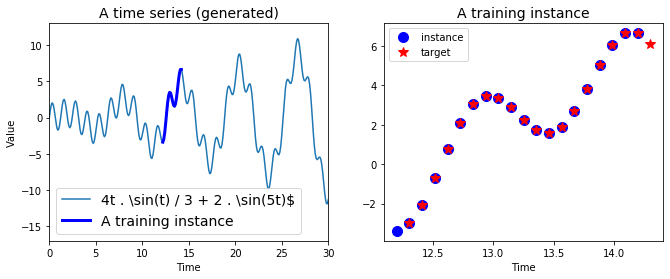

In [12]:
reset_graph()
# time starts from 0 to 30
t_min, t_max = 0, 30
# we sample time_series function for every 0.1
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 *np.sin(t*5)

def next_batch(batch_size, n_steps):
    """
    Returns a batch with 'n_steps': number of instances
    """
    #randomly get a starting number between a range
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    # make a list until of number with n_steps until the next batch
    Ts = t0 + np.arange(0., n_steps+1) * resolution
    # get the outputs of time_series functio given the input Ts (time points)
    ys = time_series(Ts)
    
    # return X's and Y's
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:,1:].reshape(-1, n_steps, 1)

# inputs to the time_series funtion
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
# a training instance
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps+ 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
# plot all the data
plt.plot(t, time_series(t), label=r"4t . \sin(t) / 3 + 2 . \sin(5t)$")

# plot only the training set
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "-b", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0,30,-17,13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "r*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [17]:
X_batch, y_batch = next_batch(1, n_steps)

# combining X_batch and y_batch for better pringing, first_column=X, second_column=Y
print("   X                  Y")
print(np.c_[X_batch[0], y_batch[0]])
# Did you notice the shift in y values?

   X                  Y
[[-1.07494007 -2.13397493]
 [-2.13397493 -3.01159593]
 [-3.01159593 -3.50676154]
 [-3.50676154 -3.5087468 ]
 [-3.5087468  -3.02399213]
 [-3.02399213 -2.17430103]
 [-2.17430103 -1.1668318 ]
 [-1.1668318  -0.24323385]
 [-0.24323385  0.37961546]
 [ 0.37961546  0.56276097]
 [ 0.56276097  0.27919223]
 [ 0.27919223 -0.37959323]
 [-0.37959323 -1.22609326]
 [-1.22609326 -2.0228619 ]
 [-2.0228619  -2.54084972]
 [-2.54084972 -2.61573898]
 [-2.61573898 -2.18847894]
 [-2.18847894 -1.32009466]
 [-1.32009466 -0.17714055]
 [-0.17714055  1.00864344]]


In [20]:
reset_graph()
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1
learning_rate = 0.04
n_iterations = 50
batch_size = 50

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# We use 'dynamic_rnn' and 'BasicRNNCell' utilities in this case, with tf.nn.relu
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# This part is visually shown in the book figure 14-10.
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])

# What do you think line below will be doing (Tip: https://www.tensorflow.org/api_docs/python/tf/layers/dense)
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)

outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf. train.Saver()

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
            
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    saver.save(sess, "./my_time_series_model")

0 	MSE: 4.3256245


In [21]:
y_pred

array([[[-4.2355604 ],
        [-2.8930793 ],
        [-1.0720898 ],
        [ 0.19241448],
        [ 1.1702043 ],
        [ 2.4491062 ],
        [ 3.4324725 ],
        [ 3.579721  ],
        [ 3.2530177 ],
        [ 2.5426524 ],
        [ 1.8609333 ],
        [ 1.4118354 ],
        [ 1.4581238 ],
        [ 1.9708637 ],
        [ 2.96801   ],
        [ 4.207843  ],
        [ 5.4267163 ],
        [ 6.315991  ],
        [ 6.669714  ],
        [ 6.401564  ]]], dtype=float32)

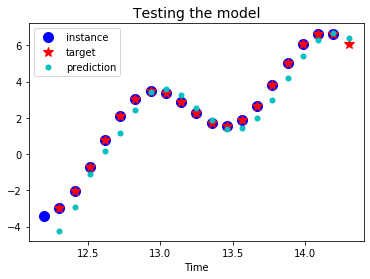

In [22]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "r*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "c.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

INFO:tensorflow:Restoring parameters from ./my_time_series_model


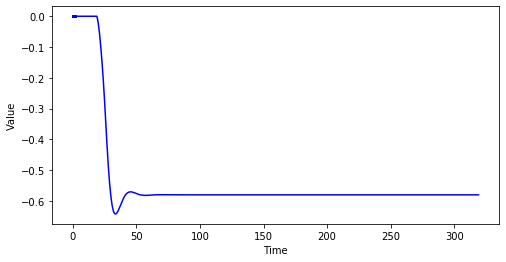

In [23]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")
    
    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0,-1,0])
        
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
    
    
    